## Avocado Price In Different Region of USA and factors that affects Avocado Price:

Programming language used: python 3.7.3 in jupyter notebook

## Introduction:

Here I am using Avocado Price dataset, to look what features affects the increment on Avocado sales. My target feature is total price which I will get later after multiplying average price to total volume. I am looking at certain features that is more correlated to total price. For that I am making my models and making prediction and see if my models makes better prediction or not! I am using following contents: 

## Contents:
**1.Introduction**

**2.Libraries**

**3.EDA**

**4.Feature Engineering**

**5.Feature Selection**

**6.Modelling**

**7.Making Prediction**

**8.Regularization using Ridge, Lasso, and ElasticNet**

**9.Comparision of different models**

**10.Conclusion**

## Libraries:

In [1]:
import pandas as pd #for dataframe
import numpy as np #linear algebra libraries
import matplotlib.pyplot as plt #visualization
import seaborn as sns # seaborn for visualization
import math #statistics
import scipy.stats as stats #for ttest
from sklearn.preprocessing import StandardScaler # for standardization and normalization
from sklearn.decomposition import PCA #to reduce Linear dimensionality
from sklearn.preprocessing import normalize #for normalization
from sklearn.preprocessing import scale #for standardization

import warnings
warnings.filterwarnings("ignore")

### Reading CSV file:

In [2]:
avocado = pd.read_csv('avocado.csv') #reading csv file
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


### Copy the file:

In [3]:
#copy the file first
avocado_c = avocado.copy()

In [4]:
#looking for shape of the file
avocado_c.shape

(18249, 14)

Observation:
- There is total of 18249 rows and 14 columns.

## EDA:
**Exploratory Data Analysis**

- Description
- Data Cleaning
- Data Exploration


In [5]:
#Lets, see some information of data
avocado_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Observation:
- Total column of 18249
- From above we can see there is no null value in the attributes.
- Date could be convert to integer fom object
- region and type are object, and all others are int/float.
- There is 1.9+ memory used.

### Description:

In [6]:
##to generate descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution.
avocado_c.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observation:
- There is some columns with numbers(4046, 4225, 4770), which is actually volume for PLU coded avocados, I will change these columns to proper name to make it easy to identify.
- Unnamed column doesn't say what it is so I will drop this column.
- Count looks fine for all features.
- Average Price looks fine.
- Standard deviation for Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags looks higher, which might because of outliers.
- We can see minimum = 0 in some of the features, it could be because of no production of avocado at that region at that time.
- All other statistics looks fine.

### Data Cleaning:

#### Removing the first column named unnamed.

In [7]:
#dropping the unnamed column
avocado_c.drop(['Unnamed: 0'], axis = 1, inplace = True)

#### Changing features name:

In [8]:
#renaming columns 4046, 4225, 4770
avocado_c.rename(index=str, columns={"4046": "PLU_4046", "4225": "PLU_4225", "4770": "PLU_4770"}, inplace = True)

#### Finding unique value of type and region:
To see if there is any duplicates, missing values, or any unnecessary strings attached:

In [9]:
#use function to find
cols = avocado_c[['type', 'region']]
for column in cols:
    print("--Unique values in column {} are:\n {}, \n unique number is : {}"
          .format(column, avocado_c[column].unique(), avocado_c[column].nunique()))

--Unique values in column type are:
 ['conventional' 'organic'], 
 unique number is : 2
--Unique values in column region are:
 ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico'], 
 unique number is : 54


Observation:
- There are two types: conventional and organic.
- There is total 54 unique number of regions.
- From above, we can see that there is some region which comes under another region like Sacramento, SanDiego, SanFrancisco which comes under California.
- Need to be drop States: NewYork, California, SouthCarolina. 
- Dropping Places/area but not region: GreatLakes, Midsouth, Northeast, Plains, SouthCentral, Southeast, TotalUS, West.

#### Dropping state and places/area :
- Regions comes under states and areas which doesn't consider as region.

In [10]:
#dropping states and places/areas

drop_row = ['NewYork', 'California', 'SouthCarolina', 'SouthCentral',  'Southeast', 
            'TotalUS', 'West', 'GreatLakes', 'Northeast', 'Plains', 'Midsouth']
 
# Delete these row from region
avocado_c = avocado_c[~avocado_c.region.isin(drop_row)]


### Data Exploration:

#### Outliers:
Looking for any outliers using **BoxPlot Visualization**

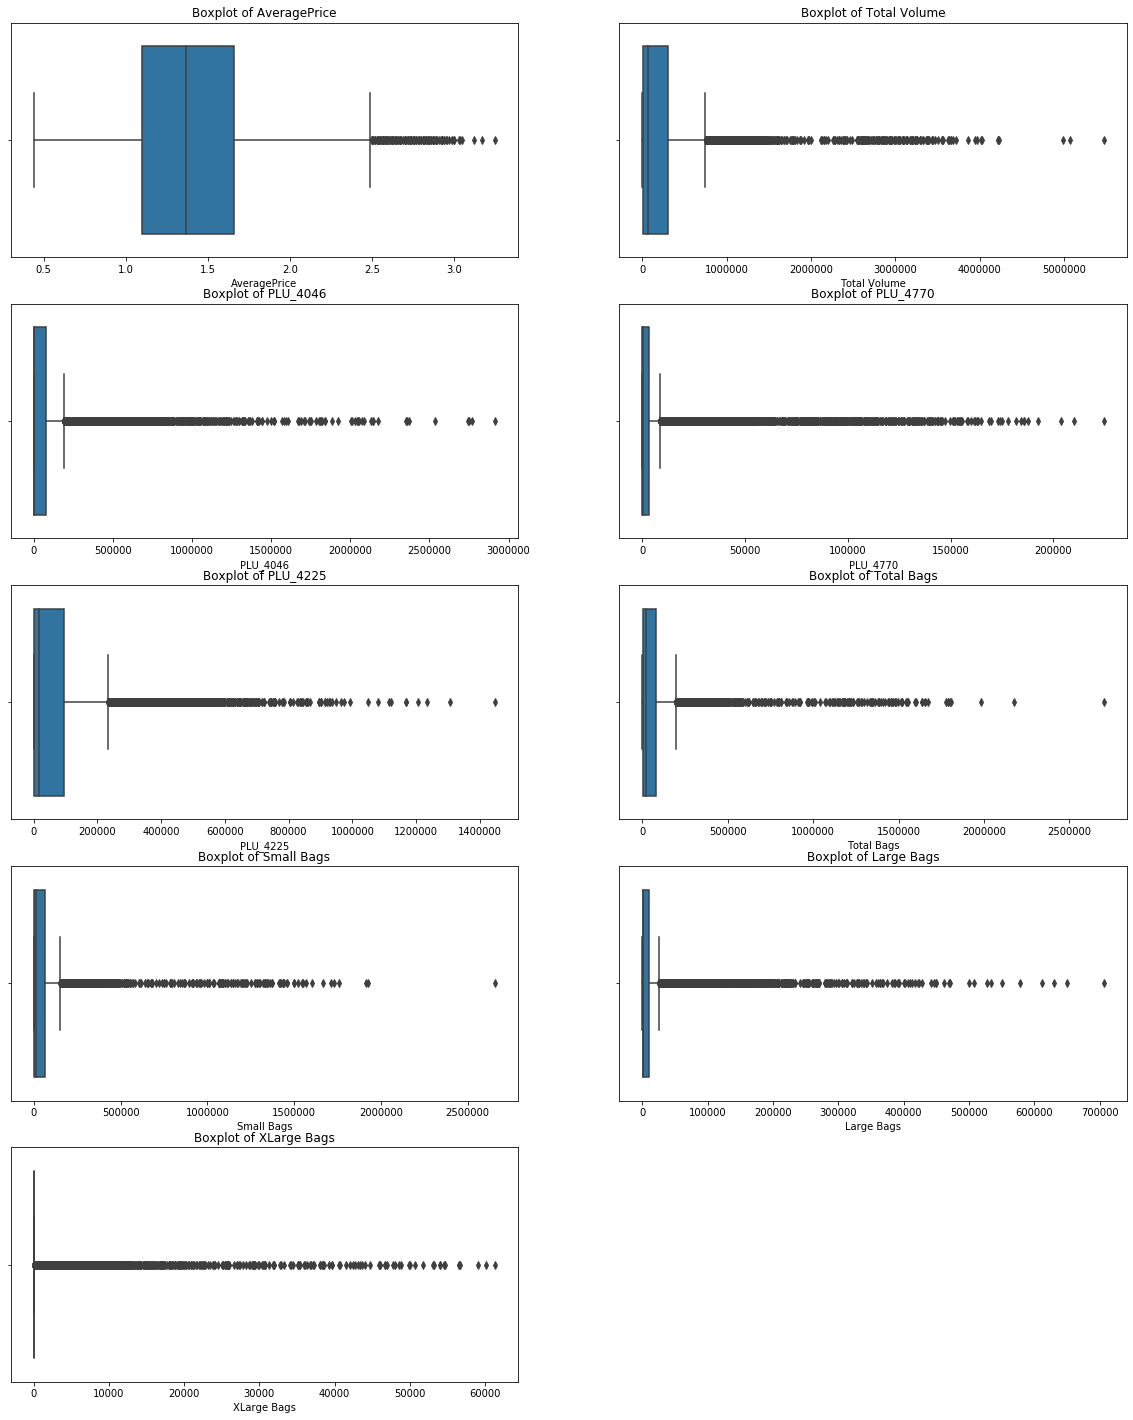

In [11]:
#plotting figure with figure size
plt.figure(figsize=(20,25))

#subpoltting the graphs
plt.subplot(5,2,1)
sns.boxplot(avocado_c["AveragePrice"]) #boxplot to see outliers
plt.title("Boxplot of AveragePrice")

plt.subplot(5,2,2)
sns.boxplot(avocado_c["Total Volume"])
plt.title("Boxplot of Total Volume")

plt.subplot(5,2,3)
sns.boxplot(avocado_c["PLU_4046"])
plt.title("Boxplot of PLU_4046")

plt.subplot(5,2,4)
sns.boxplot(avocado_c["PLU_4770"])
plt.title("Boxplot of PLU_4770")

plt.subplot(5,2,5)
sns.boxplot(avocado_c["PLU_4225"])
plt.title("Boxplot of PLU_4225")

plt.subplot(5,2,6)
sns.boxplot(avocado_c["Total Bags"])
plt.title("Boxplot of Total Bags")

plt.subplot(5,2,7)
sns.boxplot(avocado_c["Small Bags"])
plt.title("Boxplot of Small Bags")

plt.subplot(5,2,8)
sns.boxplot(avocado_c["Large Bags"])
plt.title("Boxplot of Large Bags")

plt.subplot(5,2,9)
sns.boxplot(avocado_c["XLarge Bags"])
plt.title("Boxplot of XLarge Bags")



plt.show()


Observation:
- From the boxplot visualization, we can see that, the volume features have higher outliers.
- Outliers seems fine because, volume of avocado is affected by many reasons, also the production of avocados at that region, time, resources.
- Outliers is fine here, so I will be leaving outliers as it is.

### Feature Engineering:

#### Making new features out of old one:
Actually, I am trying to look for total price rather than average price so I am going to change some of the features to its calculated price.

In [12]:
#finding price by multiplying total volume and average price which is unit price of avocado

avocado_c['total price'] = avocado_c['AveragePrice'] * avocado_c['Total Volume']

avocado_c['price_PLU_4046'] = avocado_c['AveragePrice'] * avocado_c['PLU_4046']
avocado_c['price_PLU_4225'] = avocado_c['AveragePrice'] * avocado_c['PLU_4225']
avocado_c['price_PLU_4770'] = avocado_c['AveragePrice'] * avocado_c['PLU_4770']
avocado_c['price_totPLU'] = avocado_c['price_PLU_4046'] + avocado_c['price_PLU_4225'] +avocado_c['price_PLU_4770']


avocado_c['price_Total Bags'] = avocado_c['AveragePrice'] * avocado_c['Total Bags']
avocado_c['price_Small Bags'] = avocado_c['AveragePrice'] * avocado_c['Small Bags']
avocado_c['price_Large Bags'] = avocado_c['AveragePrice'] * avocado_c['Large Bags']
avocado_c['price_XLarge Bags'] = avocado_c['AveragePrice'] * avocado_c['XLarge Bags']


#### One-Hot coding:
Changing categorical features: type and region to numerical features for later use:

In [13]:
# One hot coding for type of avocado
dummy = pd.get_dummies(avocado_c[["type","region"]], drop_first = True)

In [14]:
#Changing date into month and days, as there is year already
avocado_c['month'] = pd.DatetimeIndex(avocado_c['Date']).month
avocado_c['day'] = pd.DatetimeIndex(avocado_c['Date']).day

#dropping date now as we have year, month and day separately
avocado_c.drop(['Date'], axis = 1, inplace = True)

#### Concating:
Adding all the feature together for data exploration:

In [15]:
#adding all features together using concat
avocado_c = pd.concat([avocado_c, dummy], axis = 1)
avocado_c.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0


#### Data Exploration after some feature engineering:

### Visualization:

#### Visualizing distribution of target feature which is total price:

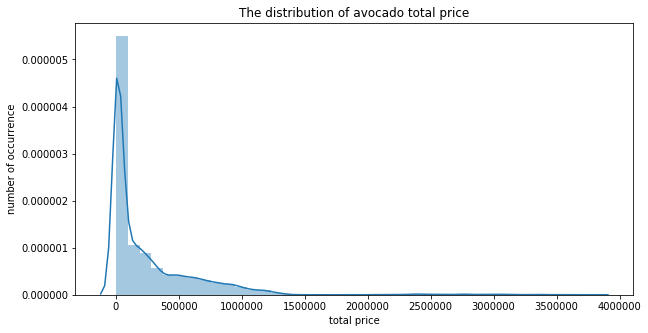

In [22]:
#plottin figure
plt.figure(figsize=(10,5))

sns.distplot(avocado_c['total price'], bins = 40)
plt.title("The distribution of avocado total price")
plt.xlabel("total price")
plt.ylabel("number of occurrence")
plt.show()

Observation:
- skwed to right.
- not normally distributed.

#### Scatterplot using seaborn for Visualization to see the correlation between target variables and other features.

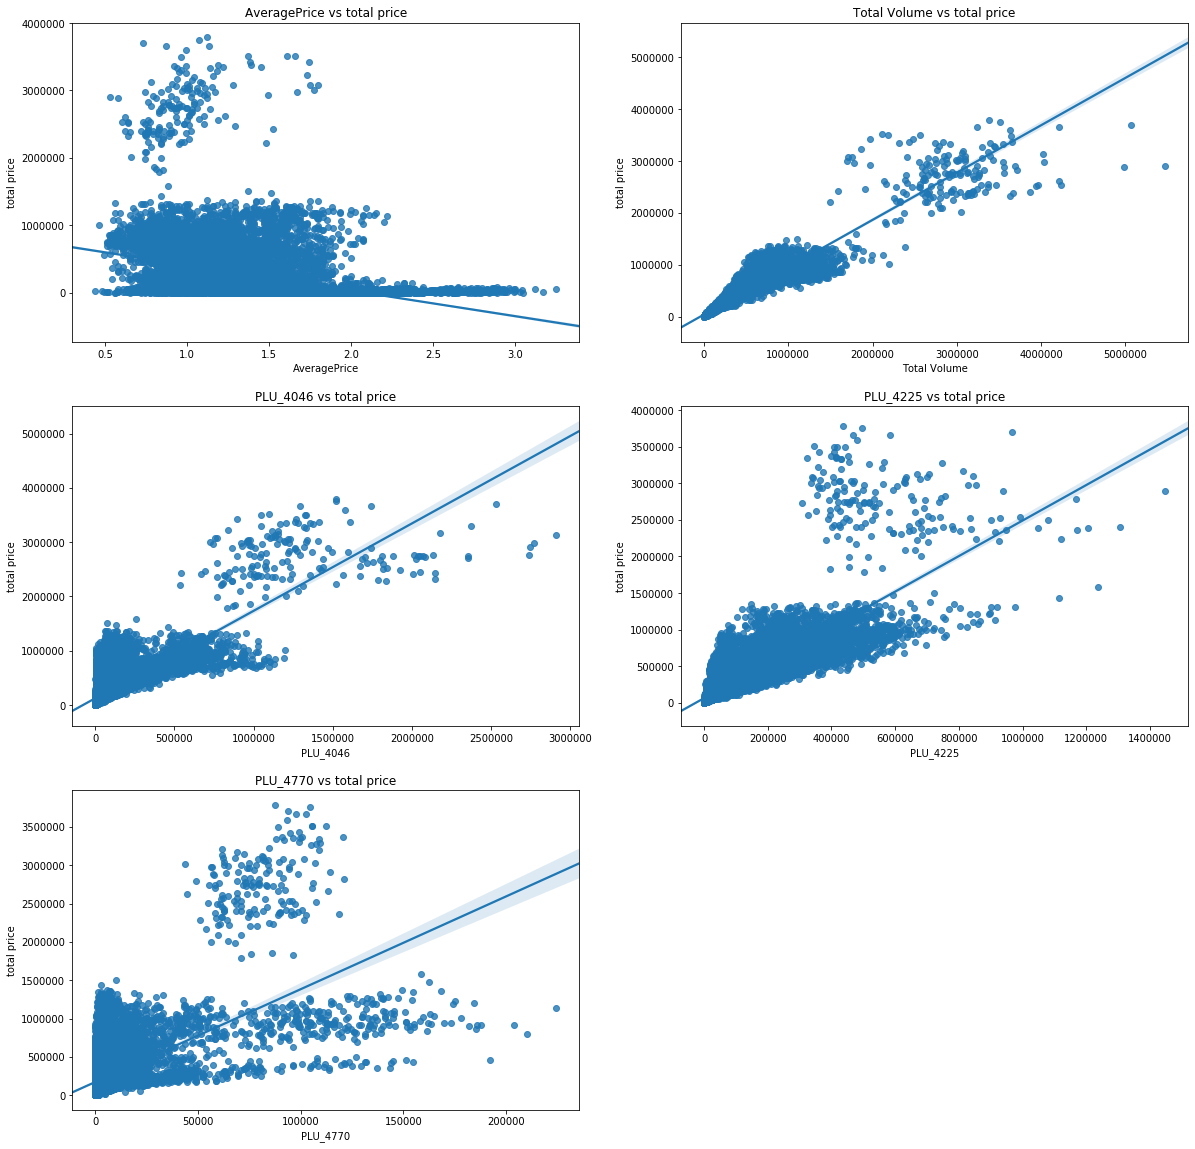

In [25]:
#finding ground relation of each features to target using scatter plot

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.regplot(avocado_c["AveragePrice"], avocado_c["total price"])
plt.title("AveragePrice vs total price")

plt.subplot(3,2,2)
sns.regplot(avocado_c["Total Volume"], avocado_c["total price"])
plt.title("Total Volume vs total price")

plt.subplot(3,2,3)
sns.regplot(avocado_c["PLU_4046"], avocado_c["total price"])
plt.title("PLU_4046 vs total price")

plt.subplot(3,2,4)
sns.regplot(avocado_c["PLU_4225"], avocado_c["total price"])
plt.title("PLU_4225 vs total price")

plt.subplot(3,2,5)
sns.regplot(avocado_c["PLU_4770"], avocado_c["total price"])
plt.title("PLU_4770 vs total price")


plt.show()


Observation:
- AveragePrice vs total price: no correlaton shown, some clusters in different place.
- Total Volume vs total price: positive correlation with some outliers shown.
- PLU_4046 vs total price: positive correlation and some outliers.
- PLU_4225 vs total price: positive correlation and some outliers of higher price.
- PLU_4770 vs total price: positive correlation and lots of outliers.

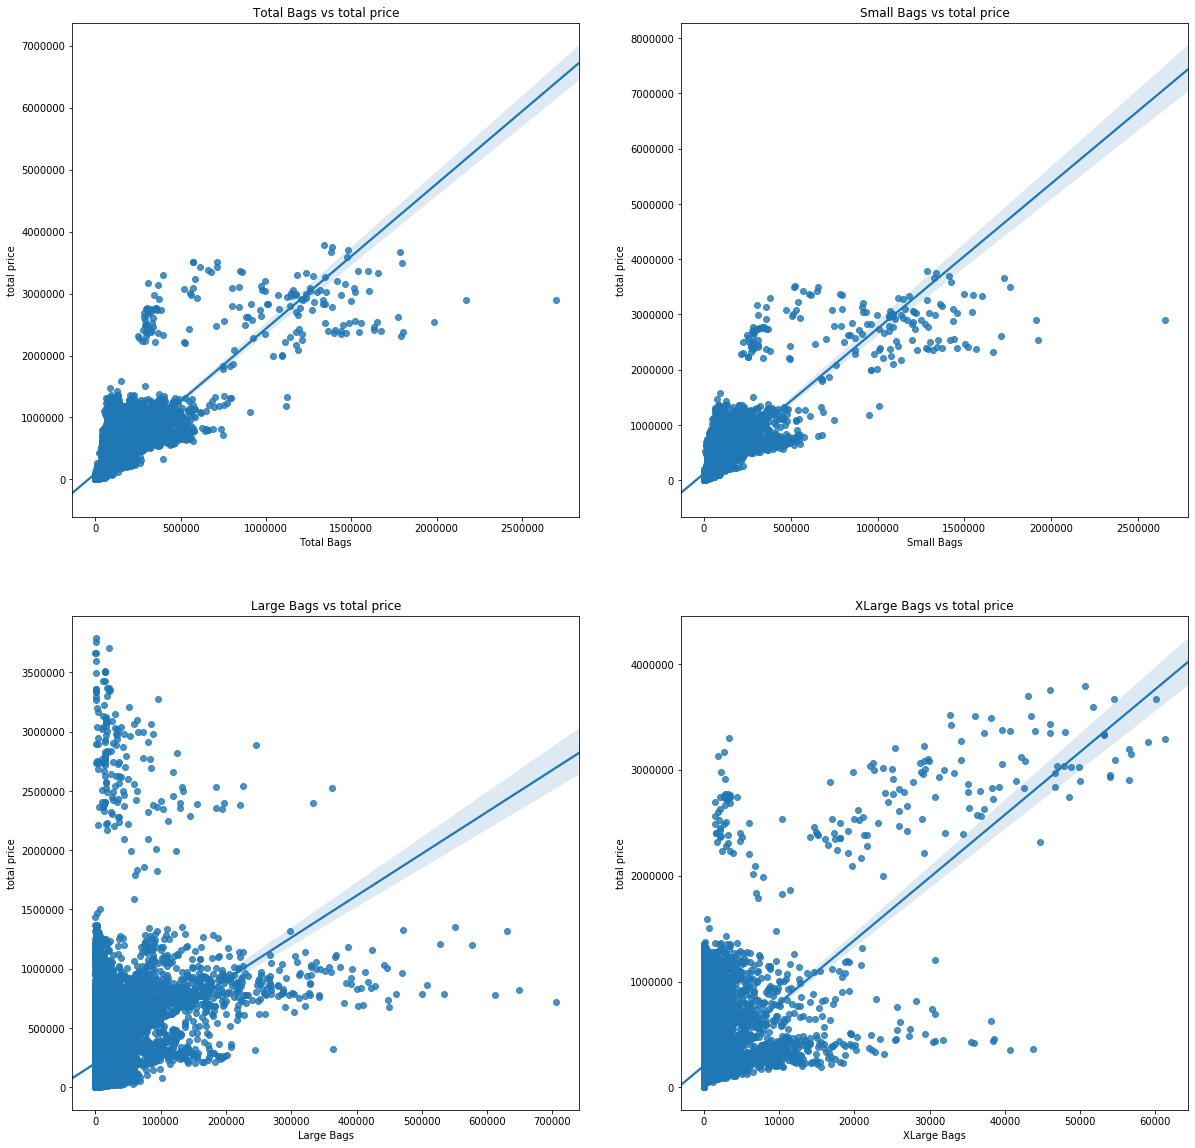

In [26]:
#finding ground relation of each features to target using scatter plot

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.regplot(avocado_c["Total Bags"], avocado_c["total price"])
plt.title("Total Bags vs total price")

plt.subplot(2,2,2)
sns.regplot(avocado_c["Small Bags"], avocado_c["total price"])
plt.title("Small Bags vs total price")

plt.subplot(2,2,3)
sns.regplot(avocado_c["Large Bags"], avocado_c["total price"])
plt.title("Large Bags vs total price")

plt.subplot(2,2,4)
sns.regplot(avocado_c["XLarge Bags"], avocado_c["total price"])
plt.title("XLarge Bags vs total price")

plt.show()


Observation:
- Total Bags vs total price: highly correlated with some outliers.
- Small Bags vs total price: highly correlated with some outliers.
- Large Bags vs total price: correlated with lots of outliers.
- XLarge Bags vs total price: correlated with lots of outliers distributed everywhere.

#### Visualization for categorical variable:

#### Checking for the average price for types of avocado:
Just to see how average price is different for different type:

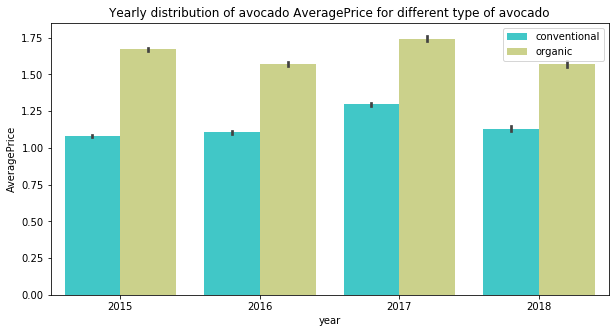

type
conventional    1.159810
organic         1.655381
Name: AveragePrice, dtype: float64


In [31]:
# bar chart of Average price of avocado and type of avocado
plt.figure(figsize=(10,5))
sns.barplot(avocado_c['year'], avocado_c['AveragePrice'], hue=avocado_c['type'], data= avocado_c, palette='rainbow')
plt.title('Yearly distribution of avocado AveragePrice for different type of avocado' )
plt.legend(loc='upper right')

plt.show()
print(avocado_c.groupby('type')['AveragePrice'].mean())

Observation:
- From above we can see that, average price of organic is higher than conventional avocado.
- Average price of avocados are not dependend on year.
- Mean price for conventional is 1.16 and for organic is 1.66.

#### Now, checking for Yearly distribution of avocado total price for different types of avocado:

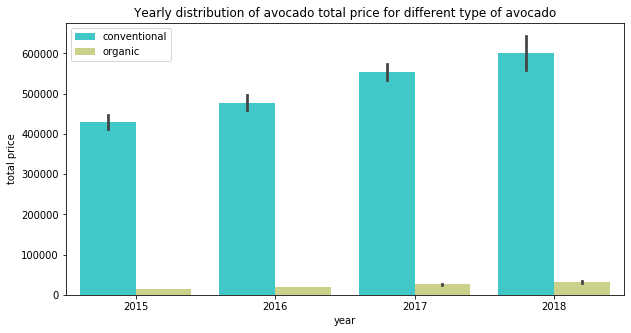

type
conventional    495328.006922
organic          20911.048225
Name: total price, dtype: float64


In [33]:
# bar chart of total price of avocado and type of avocado
plt.figure(figsize=(10,5))
sns.barplot(avocado_c['year'], avocado_c['total price'], hue=avocado_c['type'], data = avocado_c, palette='rainbow')
plt.title('Yearly distribution of avocado total price for different type of avocado' )
plt.legend(loc='upper left')

plt.show()
print(avocado_c.groupby('type')['total price'].mean())

Observation:
- As we can see, total price is higher for conventional than for organic avocados, it could be becasue the production of conventional is higher than organic or people tend to buy more conventional than organic.
- Here we can see that total price is dependent to year, as the growth of total price is growing as the years.

#### Barplot to visualize correlation of region to the average price and total price:

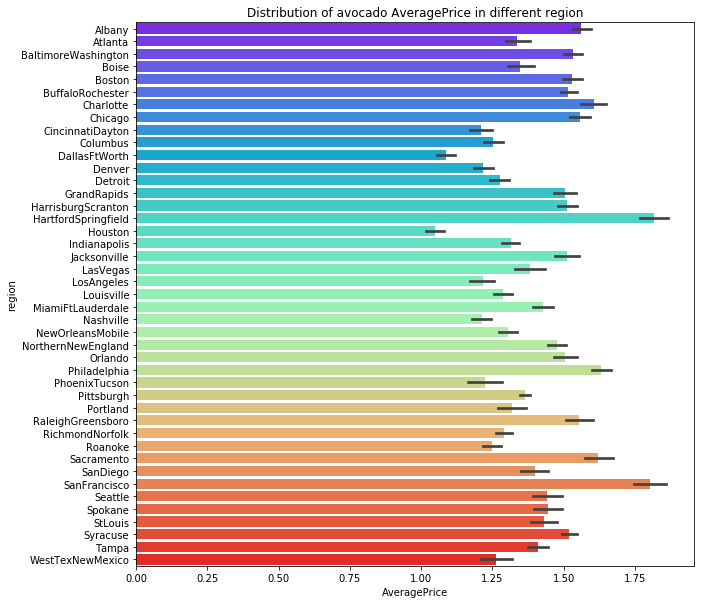

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Nashville              1.212101
NewOrleansMobile       1.304793
NorthernNewEngland     1.477396
Orlando                1.506213
Philadelphia           1.632130
PhoenixTucson          1.224438
Pittsburgh             1.364320
Portland               1.317722
R

In [22]:
# bar chart of average price of avocado and region
plt.figure(figsize=(10, 10))
sns.barplot(avocado_c['AveragePrice'], avocado_c['region'], data = avocado_c, palette='rainbow')
plt.title('Distribution of avocado AveragePrice in different region' )
plt.show()
print(avocado_c.groupby('region')['AveragePrice'].mean())

Observation:
- Highest average price is in HartfordSpringfield of 1.81 and then SanFrancisco of 1.80.
- Lowest average price is in Houston of 1.05.

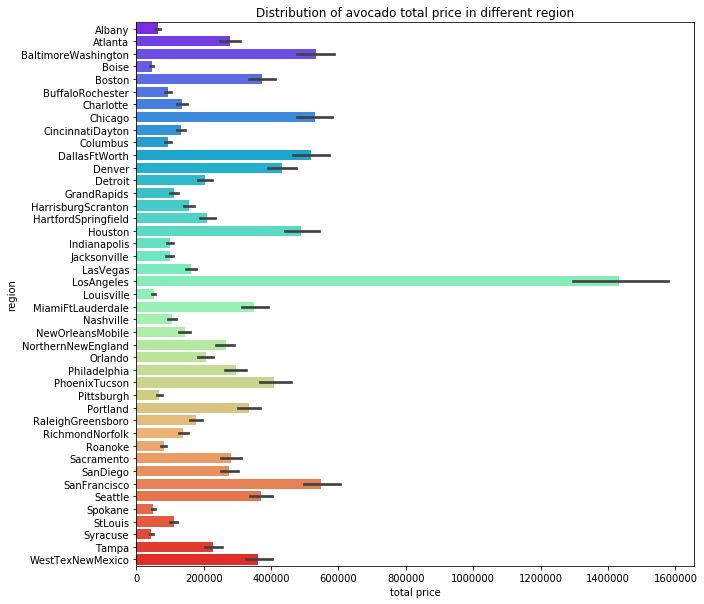

region
Albany                 6.439859e+04
Atlanta                2.774952e+05
BaltimoreWashington    5.322735e+05
Boise                  4.540434e+04
Boston                 3.743873e+05
BuffaloRochester       9.332868e+04
Charlotte              1.353344e+05
Chicago                5.299130e+05
CincinnatiDayton       1.331053e+05
Columbus               9.338150e+04
DallasFtWorth          5.195541e+05
Denver                 4.319019e+05
Detroit                2.045155e+05
GrandRapids            1.119859e+05
HarrisburgScranton     1.566708e+05
HartfordSpringfield    2.106108e+05
Houston                4.898560e+05
Indianapolis           1.006649e+05
Jacksonville           9.906496e+04
LasVegas               1.621570e+05
LosAngeles             1.432626e+06
Louisville             5.176197e+04
MiamiFtLauderdale      3.508329e+05
Nashville              1.057001e+05
NewOrleansMobile       1.440126e+05
NorthernNewEngland     2.651635e+05
Orlando                2.059503e+05
Philadelphia         

In [23]:
# bar chart of total price of avocado and type of avocado
plt.figure(figsize=(10,10))
sns.barplot(avocado_c['total price'], avocado_c['region'], data = avocado_c, palette='rainbow')
plt.title('Distribution of avocado total price in different region' )
plt.show()
print(avocado_c.groupby('region')['total price'].mean())

Observation:
- Highest total price is in LosAngeles of 1.432626e+06, and lowest in Syracuse of 4.498578e+04.
- From above we can say that highest production happens in california with highest total price.

## Feature Selection:

### Correlation matrix: to see correlation between features:
- correlation of other features to total price:

In [24]:
avocado_c.iloc[:, :13].corr() 

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,total price
AveragePrice,1.000000,-0.458287,-0.411982,-0.365340,-0.253495,-0.390232,-0.328867,-0.335109,-0.158155,0.094148,-0.383309
Total Volume,-0.458287,1.000000,0.890380,0.787495,0.576676,0.869796,0.836906,0.429051,0.549505,0.038196,0.953047
PLU_4046,-0.411982,0.890380,1.000000,0.505321,0.412247,0.684041,0.653724,0.348216,0.454440,-0.001381,0.800846
PLU_4225,-0.365340,0.787495,0.505321,1.000000,0.580107,0.577115,0.563730,0.265454,0.308823,-0.019325,0.825386
PLU_4770,-0.253495,0.576676,0.412247,0.580107,1.000000,0.429245,0.437290,0.121320,0.492822,-0.054538,0.596108
Total Bags,-0.390232,0.869796,0.684041,0.577115,0.429245,1.000000,0.956905,0.509324,0.622964,0.142294,0.817629
Small Bags,-0.328867,0.836906,0.653724,0.563730,0.437290,0.956905,1.000000,0.238270,0.658700,0.109127,0.795897
Large Bags,-0.335109,0.429051,0.348216,0.265454,0.121320,0.509324,0.238270,1.000000,0.080479,0.149575,0.371666
XLarge Bags,-0.158155,0.549505,0.454440,0.308823,0.492822,0.622964,0.658700,0.080479,1.000000,0.098566,0.572526
year,0.094148,0.038196,-0.001381,-0.019325,-0.054538,0.142294,0.109127,0.149575,0.098566,1.000000,0.076544


Observation:
- total price is highly correlated  to Total Volume, PLU_4046, PLU_ 4225, Total Bags, Small Bags.
- XLarge Bags and PLU_4770 has correlation higher than 0.5.
- Large Bags has lower correlation, and year shows no correlation to total price at all.

In [25]:
avocado_c.iloc[:, 12:].corr() 

,total price,price_PLU_4046,price_PLU_4225,price_PLU_4770,price_totPLU,price_Total Bags,price_Small Bags,price_Large Bags,price_XLarge Bags,month,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
total price,1.000000,0.851871,0.780131,0.562878,0.975113,0.865106,0.841194,0.371647,0.558994,-0.023060,...,-0.067194,0.008474,0.007035,0.110665,0.042570,-0.078704,-0.055933,-0.080895,-0.011566,0.039554
price_PLU_4046,0.851871,1.000000,0.409225,0.354553,0.852755,0.686996,0.661685,0.308232,0.491093,-0.017526,...,-0.049366,0.005109,0.018833,0.047823,-0.006617,-0.058024,-0.029308,-0.068245,0.036094,0.105949
price_PLU_4225,0.780131,0.409225,1.000000,0.561934,0.822076,0.536076,0.539000,0.186455,0.280138,-0.021426,...,-0.065785,0.058089,-0.001824,0.234442,0.030804,-0.074973,-0.077610,-0.065471,-0.056063,-0.035867
price_PLU_4770,0.562878,0.354553,0.561934,1.000000,0.590535,0.392686,0.409088,0.068118,0.462755,-0.026218,...,-0.050913,-0.014876,0.013774,0.044619,-0.029316,-0.045653,-0.050845,-0.050718,-0.050548,-0.003157
price_totPLU,0.975113,0.852755,0.822076,0.590535,1.000000,0.732369,0.719776,0.291623,0.482967,-0.024037,...,-0.068817,0.032732,0.011559,0.156726,0.010029,-0.078548,-0.062867,-0.080127,-0.011623,0.045246
price_Total Bags,0.865106,0.686996,0.536076,0.392686,0.732369,1.000000,0.955051,0.481635,0.624118,-0.016442,...,-0.050673,-0.048026,-0.004544,-0.014701,0.108050,-0.064008,-0.029552,-0.067165,-0.009225,0.019114
price_Small Bags,0.841194,0.661685,0.539000,0.409088,0.719776,0.955051,1.000000,0.201294,0.656385,-0.015679,...,-0.039763,-0.033173,0.006762,0.004315,0.103588,-0.054417,-0.023203,-0.056740,-0.027290,-0.006764
price_Large Bags,0.371647,0.308232,0.186455,0.068118,0.291623,0.481635,0.201294,1.000000,0.062196,-0.008949,...,-0.049630,-0.061914,-0.032319,-0.060286,0.061094,-0.050544,-0.029416,-0.054852,0.048575,0.083239
price_XLarge Bags,0.558994,0.491093,0.280138,0.462755,0.482967,0.624118,0.656385,0.062196,1.000000,-0.001242,...,-0.027446,-0.008050,-0.019096,-0.004328,-0.027852,-0.035819,-0.011228,-0.030283,-0.005501,-0.008852
month,-0.023060,-0.017526,-0.021426,-0.026218,-0.024037,-0.016442,-0.015679,-0.008949,-0.001242,1.000000,...,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,-0.000693


Observation:
- prices of all volume and bags are corelated to total price, but none of the region is correlated to total price, thats why I will not use any region for further analysis.
- lots of features are highly correalted to eachother, which might gives multicollinearity.
- type_organic is negatively correlated to total price.


#### Visualization of correlation using sns:

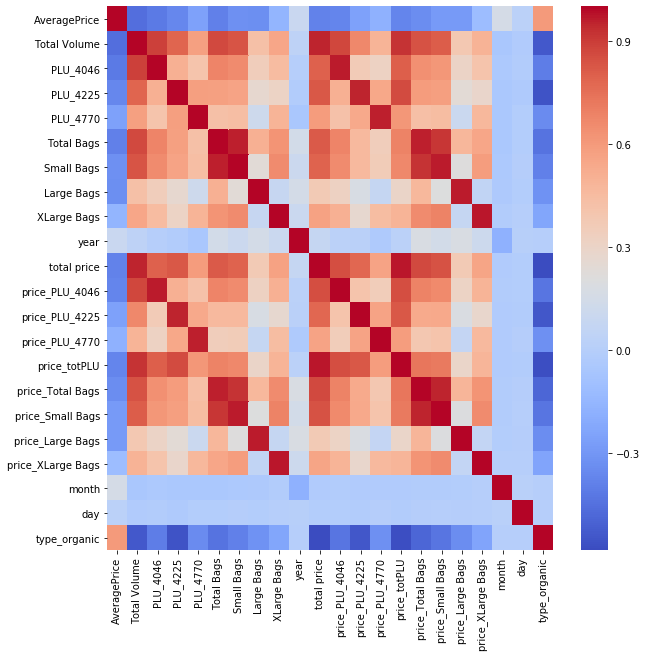

In [26]:
#plotting sns figure for correlation without region features
plt.figure(figsize=(10,10))
sns.heatmap(avocado_c.iloc[:, :24].corr(),cmap='coolwarm')

Observation:
- from the visualization we can see correlation of features to total price.
- all the features except averageprice, month, day, year, type_organic are highly correlated to each other.
- most of features are dependent to eachother.
- Total volume is sum of all bags and coded bulk, so I will drop total volume.
- Total bag is sum of all the bags so I will drop total bags too.
- as we can see total bags is highly correlated to small bags which means small bags sold in higher quantity than others.
- Likewise total volume is highly correlated to PLU_4046, and then PLU_4225, and small bags, so most of the volume is of those coded and small bags.


In [27]:
#dropping total volume and total bags
avocado_c.drop(['Total Volume', 'Total Bags', 'type', 'region'], axis = 1, inplace= True)


#### Modelling:

#### Initial modelling:

In [28]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Y is the target variable
Y = avocado_c['total price']
# X is the feature set which includes
# only highly correlated features to total price except price of bulk
X = avocado_c[['AveragePrice', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Small Bags', 
              'Large Bags', 'XLarge Bags', 'year', 'price_PLU_4046', 'price_PLU_4225', 
              'price_PLU_4770', 'price_totPLU', 'price_Total Bags', 'price_Small Bags', 
              'price_Large Bags', 'price_XLarge Bags', 'month', 'day', 'type_organic']]

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)


results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.148e+11
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:48:17   Log-Likelihood:                -58607.
No. Observations:               14531   AIC:                         1.173e+05
Df Residuals:                   14512   BIC:                         1.174e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1680.4614    266.012     -6.317      0.000   -2201.878   -1159.045
AveragePrice         -0.8695      0.399     -2.178      0.029      -1.652      -0.087
PLU_4046           8.722e-07   3.36e-06      0.260      0.795   -5.71e-06    7.46e-06
PLU_4225           3.811e-06   5.34e-06      0.714      0.475   -6.66e-06    1.43e-05
PLU_4770           1.921e-06   2.84e-05      0.068      0.946   -5.38e-05    5.76e-05
Small Bags        -2.564e-06   6.18e-06     -0.415      0.678   -1.47e-05    9.56e-06
Large Bags        -1.059e-05    1.2e-05     -0.885      0.376   -3.41e-05    1.29e-05
XLarge Bags        1.314e-05      0.000      0.074      0.941      -0.000       0.000
year                  0.8337      0.132      6.318      0.000       0.575       1.092
price_PLU_4046        0.2500   6.37e-06   3.92e+04      0.000       0.250       0.250
price_PLU_4225        0.2500   8.16e-06   3.06e+04      0.000       0.250       0.250
price_PLU_4770        0.2500   1.86e-05   1.34e+04      0.000       0.250       0.250
price_totPLU          0.7500   5.61e-06   1.34e+05      0.000       0.750       0.750
price_Total Bags      0.5467      1.515      0.361      0.718      -2.423       3.516
price_Small Bags      0.4533      1.515      0.299      0.765      -2.516       3.423
price_Large Bags      0.4534      1.515      0.299      0.765      -2.516       3.423
price_XLarge Bags     0.4533      1.515      0.299      0.765      -2.516       3.423
month                 0.1106      0.034      3.280      0.001       0.045       0.177
day                   0.0026      0.013      0.201      0.841      -0.023       0.028
type_organic          1.4499      0.352      4.122      0.000       0.760       2.139
==============================================================================
Omnibus:                    49234.948   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16321190869.717
Skew:                          61.483   Prob(JB):                         0.00
Kurtosis:                    5193.533   Cond. No.                     6.47e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.54e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observation:
- We can see multicollinearity with smallest eigenvalue.
- Skewness is really high.
- R2 is 1 and Adj R2 is 1.
- F-stat = 7.148e+11 with probability of 0.
- AIC =1.173e+05
- BIC = 1.174e+05



#### Using features that are not correlated  to eachother:

In [29]:
# Y is the target variable
Y = avocado_c['total price']
# X is the feature set which includes
# features not correlated to each other
X = avocado_c[['AveragePrice', 'Large Bags', 'year', 'type_organic', 'month', 'day']]

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)


results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     1487.
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:48:17   Log-Likelihood:            -2.0482e+05
No. Observations:               14531   AIC:                         4.096e+05
Df Residuals:                   14524   BIC:                         4.097e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.105e+07   5.97e+06     -6.878      0.000   -5.27e+07   -2.93e+07
AveragePrice  -1.27e+04   8530.209     -1.489      0.137   -2.94e+04    4022.772
Large Bags       1.8584      0.068     27.330      0.000       1.725       1.992
year          2.059e+04   2960.594      6.954      0.000    1.48e+04    2.64e+04
type_organic -4.171e+05   6797.233    -61.370      0.000    -4.3e+05   -4.04e+05
month         -629.0441    783.785     -0.803      0.422   -2165.363     907.274
day           -432.4778    302.799     -1.428      0.153   -1026.002     161.047
==============================================================================
Omnibus:                    13715.298   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           681653.014
Skew:                           4.562   Prob(JB):                         0.00
Kurtosis:                      35.289   Cond. No.                     1.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation:
- lower R2 and Adj R2 than before with multicollinearity.
- lower skewness than before.

### PCA(Principal Components Analysis): To reduce multicollinearity of the model:

In [30]:
#using PCA

#between higher corelated features
X1 = avocado_c[['PLU_4046', 'PLU_4225', 'PLU_4770', 'Small Bags', 'XLarge Bags']]


X1 = StandardScaler().fit_transform(X1)

sklearn_pca = PCA(n_components=1)
avocado_c["pca_1"] = sklearn_pca.fit_transform(X1)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.60706265]


#### Checking for the correlation of pca_1 after PCA:

In [31]:
#correlation matrix
avocado_c.corr()

,AveragePrice,PLU_4046,PLU_4225,PLU_4770,Small Bags,Large Bags,XLarge Bags,year,total price,price_PLU_4046,...,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,pca_1
AveragePrice,1.000000,-0.411982,-0.365340,-0.253495,-0.328867,-0.335109,-0.158155,0.094148,-0.383309,-0.368931,...,0.080140,-0.003512,0.148527,0.013117,0.014247,0.008641,0.042230,0.000487,-0.054362,-0.391473
PLU_4046,-0.411982,1.000000,0.505321,0.412247,0.653724,0.348216,0.454440,-0.001381,0.800846,0.965111,...,-0.010128,0.013858,0.013980,-0.014606,-0.053778,-0.032555,-0.062289,0.017614,0.127767,0.781834
PLU_4225,-0.365340,0.505321,1.000000,0.580107,0.563730,0.265454,0.308823,-0.019325,0.825386,0.507919,...,0.045375,0.005967,0.184167,0.028393,-0.074485,-0.078212,-0.069645,-0.055326,-0.016709,0.757367
PLU_4770,-0.253495,0.412247,0.580107,1.000000,0.437290,0.121320,0.492822,-0.054538,0.596108,0.421240,...,-0.018211,0.017204,0.029530,-0.030460,-0.047203,-0.052982,-0.052945,-0.052697,0.014585,0.740478
Small Bags,-0.328867,0.653724,0.563730,0.437290,1.000000,0.238270,0.658700,0.109127,0.795897,0.654537,...,-0.033749,0.009103,-0.012263,0.091155,-0.046067,-0.021776,-0.052442,-0.026675,0.008452,0.861980
Large Bags,-0.335109,0.348216,0.265454,0.121320,0.238270,1.000000,0.080479,0.149575,0.371666,0.322347,...,-0.056488,-0.026105,-0.055418,0.030006,-0.047922,-0.029762,-0.051915,0.035105,0.104391,0.273016
XLarge Bags,-0.158155,0.454440,0.308823,0.492822,0.658700,0.080479,1.000000,0.098566,0.572526,0.508681,...,-0.011410,-0.018809,-0.011070,-0.027730,-0.034836,-0.009540,-0.030816,-0.008333,0.001093,0.747747
year,0.094148,-0.001381,-0.019325,-0.054538,0.109127,0.149575,0.098566,1.000000,0.076544,0.025774,...,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,-0.000265,0.036790
total price,-0.383309,0.800846,0.825386,0.596108,0.795897,0.371666,0.572526,0.076544,1.000000,0.851871,...,0.008474,0.007035,0.110665,0.042570,-0.078704,-0.055933,-0.080895,-0.011566,0.039554,0.924717
price_PLU_4046,-0.368931,0.965111,0.507919,0.421240,0.654537,0.322347,0.508681,0.025774,0.851871,1.000000,...,0.005109,0.018833,0.047823,-0.006617,-0.058024,-0.029308,-0.068245,0.036094,0.105949,0.789283


Observation:
- pca_1 gives higher correlation than anyother features.

#### Checking for OLS after PCA, usng only pca_1, and one binary feature:

In [32]:
# Y is the target variable
Y = avocado_c['total price']
# X is the feature set 
X = avocado_c[['pca_1', 'type_organic']]

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)


results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 5.167e+04
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:48:17   Log-Likelihood:            -1.9309e+05
No. Observations:               14531   AIC:                         3.862e+05
Df Residuals:                   14528   BIC:                         3.862e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.269e+05   1804.083    181.186      0.000    3.23e+05     3.3e+05
pca_1         1.964e+05    781.167    251.463      0.000    1.95e+05    1.98e+05
type_organic -1.374e+05   2721.921    -50.494      0.000   -1.43e+05   -1.32e+05
==============================================================================
Omnibus:                     3209.285   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145947.798
Skew:                          -0.125   Prob(JB):                         0.00
Kurtosis:                      18.524   Cond. No.                         4.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation:
- Equation (total price) = 3.269e+05 + 1.964e+05 pca_1 + -1.374e+05 type_organic, which means there is constant of 3.269e+05, increament in total price by 1.964e+05 with any increamnet in other features with high correlation and conventional increase price by 1.374e+05 than organic one. so lots of people tend to buy conventional than organic.
- Now we can see there is no multicollinearity, and skewness is little better than before.
- R2 and adjusted R2 is 0.877 which is really good.
- F-stat is 5.167e+04 with probability of 0.
- AIC = 3.862e+05 and BIC = 3.862e+05
- p-value is 0
- std error is high for all

### Model for Prediction:

### Splitting data to train and test sets: to train the model for prediction:

In [33]:
#importing necessary libraries
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import cross_val_score

In [34]:
avocado_c.shape

(14531, 63)

In [35]:
#using only features that will be used for modelling
X = avocado_c[['pca_1', 'type_organic']]
Y = avocado_c['total price']

In [36]:
from sklearn.model_selection import train_test_split
#splitting data inti test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#printing the observations
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 11624
The number of observations in test set is 2907


In [37]:
#We add a constant to the model, the “baseline” of the data in case all of your features values are 0.

X_train = sm.add_constant(X_train)

#### Training the model :

### Using Linear Regression:

In [38]:
# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            total price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 4.035e+04
Date:                Thu, 06 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:48:18   Log-Likelihood:            -1.5455e+05
No. Observations:               11624   AIC:                         3.091e+05
Df Residuals:                   11621   BIC:                         3.091e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.274e+05   2023.789    161.780   

Observation:
- R2 and adjusted R2 is 0.874 now.
- skewness is little more to left than before.
- AIC/BIC is lower than before.
- a little different than before may be because of lower number of data.


#### Making prediction by using predict() function:

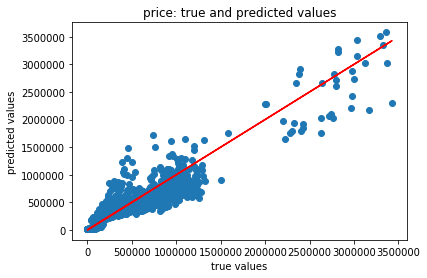

R-squared of the model in the training set is: 0.8741126592970834
-----Test set statistics-----
R-squared of the model in the test set is: 0.8866772123871896
Mean absolute error of the prediction is: 74054.42198056255
Mean squared error of the prediction is: 19213579589.513287
Root mean squared error of the prediction is: 138613.05706719437
Mean absolute percentage error of the prediction is: 88.19791333736934
OLS Accuracy: 0.88 (+/- 0.05)


In [39]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

score = cross_val_score(lrm, X_test, y_test, cv=5)

#plotting scatter
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("price: true and predicted values")
plt.show()

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Observation:
- values are more to red line, whcih means model predicts better.
- R2 of model in the test is 0.87 and in the test set is 0.89 which is better than training model. 
- values are more toward red line which is good.
- Accuracy is 0.88 with stdandar deviation of +/- 0.05.



R2 looks good before and after and variance is really low, lets do regularization to see any improvement in our model.

### Overfitting and regularization for making better prediction:
- Sometime training model overfitted/underfitted and test model won't do better.
- So we need to do some regularization to solve overfitting problem of the model.
- regularization refers to the process of modifying algorithms in order to lower the generalization gap without sacrificing training performance.
- to modify this function we can use:
  - Ridge, Lasso, and ElasticNet regression 

#### Ridge Regression:


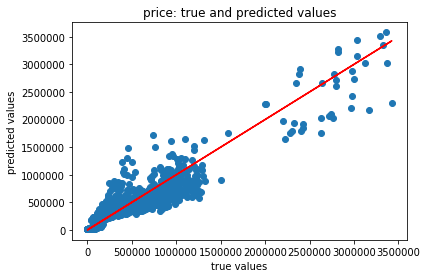

Best alpha value is: 5.0
R-squared of the model in training set is: 0.8741125712207379
-----Test set statistics-----
R-squared of the model in test set is: 0.886675687563107
Mean absolute error of the prediction is: 74069.72695574697
Mean squared error of the prediction is: 19213838119.412575
Root mean squared error of the prediction is: 138613.9896237482
Mean absolute percentage error of the prediction is: 88.88351523223827
Ridge Accuracy: 0.88 (+/- 0.05)


In [40]:
#importing library
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

#to find best alphas to use for regression
alphas = [1e-6, 1e-3, 1e-1, 0, 0.1, 1, 5, 1e3, 1e4,1e6]
ridge_cv = RidgeCV(alphas=alphas, cv=5)

#fit the model
ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

#finding score
score = cross_val_score(ridge_cv, X_test, y_test, cv=5)

#plotting scatter
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("price: true and predicted values")
plt.show()

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print("Ridge Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Observation:
- best alpha to use is 5 here.
- gives us R2 of training model = 0.87 and R2 of testing model = 0.89, same a sbefore.
- accuracy of 0.88 w/ variance of 0.05.
- Has little higher error than previous model.

#### Using Lasso Regression:

In [41]:
#using lasso regression
alphas = [1e-6, 1e-3, 1e-1, 0, 0.1, 1, 5, 1e3, 1e4,1e6]
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

score = cross_val_score(lasso_cv, X_test, y_test, cv=5)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print("Lasso Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Best alpha value is: 0.001
R-squared of the model in training set is: 0.8741126592970834
-----Test set statistics-----
R-squared of the model in test set is: 0.886677212569566
Mean absolute error of the prediction is: 74054.42207262965
Mean squared error of the prediction is: 19213579558.59182
Root mean squared error of the prediction is: 138613.0569556556
Mean absolute percentage error of the prediction is: 88.19792447082129
Lasso Accuracy: 0.88 (+/- 0.05)


Observation:
- best alpha to use is 0.001 here.
- gives us R2 of training model = 0.87 and R2 of testing model = 0.89, same a sbefore.
- accuracy of 0.88 w/ variance of 0.05.
- Has little lower error than previous model.

#### Using ElasticNet regression:

In [42]:
#using elasticnetCV
#using same alphas
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

#fitting the model
elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)


score = cross_val_score(elasticnet_cv, X_test, y_test, cv=5)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print("ElasticNet Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Best alpha value is: 0.001
R-squared of the model in training set is: 0.8741125403623766
-----Test set statistics-----
R-squared of the model in test set is: 0.8866754215666658
Mean absolute error of the prediction is: 74072.23774430335
Mean squared error of the prediction is: 19213883218.407234
Root mean squared error of the prediction is: 138614.1523020187
Mean absolute percentage error of the prediction is: 88.99473351321213
ElasticNet Accuracy: 0.88 (+/- 0.05)


Observation:
- best alpha to use is 0.001 here.
- gives us R2 of training model = 0.87 and R2 of testing model = 0.89, same a sbefore.
- accuracy of 0.88 w/ variance of 0.05.
- Has little higher error than previous model.
- So there is no improvement after regularization, so we don't need to do regularization and move forward with OLS.

### Using different models:
- KNN regression
- Decision Tree
- Random Forest
- SVM : Linear support vector machine
- Gradient Boosting 

#### Using KNN Regression:

#### Finding best Hyperparameter before doing regression:

In [43]:
from sklearn import neighbors

#Validation:
#importing modules
from sklearn.model_selection import GridSearchCV
#making the instance
knn = neighbors.KNeighborsRegressor(n_jobs=-1)
model = knn
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}


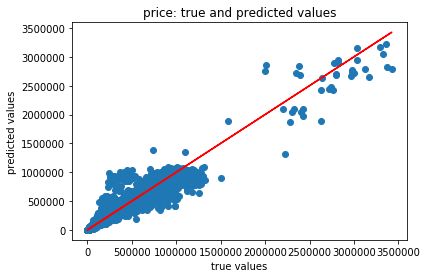

R-squared of the model in the training set is: 0.9121443284116896
-----Test set statistics-----
R-squared of the model in the test set is: 0.9130542370218564
Mean absolute error of the prediction is: 60285.02323643275
Mean squared error of the prediction is: 14741424669.6723
Root mean squared error of the prediction is: 121414.26880590395
Mean absolute percentage error of the prediction is: 33.016063120315756
KNN Accuracy: 0.91 (+/- 0.03)


In [44]:
# Build our model using best hyperparameter.
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'uniform', algorithm = 'auto',
                                    leaf_size = 1, n_jobs = -1)
knn.fit(X_train, y_train)

#making prediction
y_preds = knn.predict(X_test)


score = cross_val_score(knn, X_test, y_test, cv=5)

#plotting scatter
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("price: true and predicted values")
plt.show()

print("R-squared of the model in the training set is: {}".format(knn.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(knn.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))





Observation:
- gives us higher R2 for training model and testing model.
- accuracy of 0.91 with 0.03 std deviation.
- lower error than before.

#### Using Descision Tree:

In [45]:
from sklearn.tree import DecisionTreeRegressor
decision_tree =DecisionTreeRegressor()

model = decision_tree
#Hyper Parameters Set
params = {'criterion': ['mse', 'friedman_mse', 'mae'], 
          'splitter' : ['best', 'random'],
          'max_features' : [1, 'auto', 'sqrt', 'log2'], 
          }
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)



Best Hyper Parameters:
 {'criterion': 'mae', 'max_features': 'sqrt', 'splitter': 'random'}


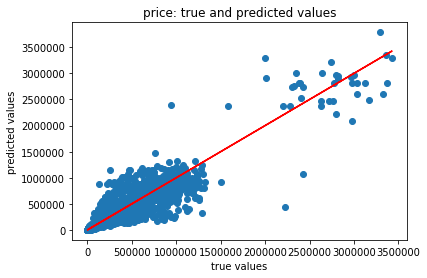

R-squared of the model in the training set is: 0.9700248381101619
-----Test set statistics-----
R-squared of the model in the test set is: 0.8526808776310101
Mean absolute error of the prediction is: 75597.1508491572
Mean squared error of the prediction is: 24977568433.675343
Root mean squared error of the prediction is: 158042.93224840946
Mean absolute percentage error of the prediction is: 39.29692060352027
DecisionTree Accuracy: 0.85 (+/- 0.07)


In [46]:
from sklearn.tree import DecisionTreeRegressor
## Build our model using best hyperparameter.

dtr = DecisionTreeRegressor(criterion = 'mae', max_features = 'log2', splitter = 'random')
dtr.fit(X_train,y_train)

#making prediction
y_preds=dtr.predict(X_test)


score = cross_val_score(dtr, X_test, y_test, cv=5)

#plotting scatter
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("price: true and predicted values")
plt.show()

print("R-squared of the model in the training set is: {}".format(dtr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(dtr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
print("DecisionTree Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Observation:
- values are little disbursed for higher values, better prdicted lower values than higher.
- R2 of testing model is lower than R2 of training model.
- higher error than KNN regression model.
- accuracy of 0.85 with std deviation of 0.07, which is lower than KNN Regression

#### Using Random Forest:

In [47]:
from sklearn.ensemble import RandomForestRegressor
#finding best hyperparameter

rdr = RandomForestRegressor()

model = rdr
#Hyper Parameters Set
params = {'n_estimators' : [10, 100], 'criterion': ['mae', 'mse'], 
          'max_features' : [1, 'auto', 'sqrt', 'log2'], 
          }
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)



Best Hyper Parameters:
 {'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 100}


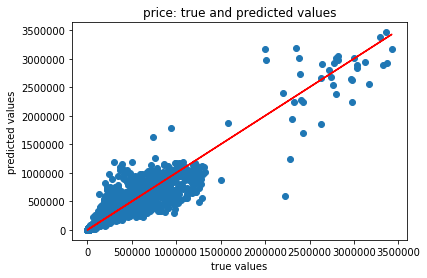

R-squared of the model in the training set is: 0.9790674071089425
-----Test set statistics-----
R-squared of the model in the test set is: 0.8787701110614637
Mean absolute error of the prediction is: 69577.53252195304
Mean squared error of the prediction is: 20554207753.049587
Root mean squared error of the prediction is: 143367.3873412276
Mean absolute percentage error of the prediction is: 37.097975874350034
RandomTree Accuracy: 0.88 (+/- 0.05)


In [48]:
#using best hyperparameter.
rdr = RandomForestRegressor(criterion = 'mae', max_features = 'log2', n_estimators = 100)

rdr.fit(X_train,y_train)

#making prediction
y_preds=rdr.predict(X_test)

#to find accuracy
score = cross_val_score(rdr, X_test, y_test, cv=5)

#plotting scatter
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("price: true and predicted values")
plt.show()

print("R-squared of the model in the training set is: {}".format(rdr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(rdr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
print("RandomTree Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Observation:
- true values are little disbursed on this model too.
- R2 of training model is 0.98 and R2 of testing model is 0.88, higher variance.
- accuracy of 0.88 with std deviation of 0.05 , which is better than decision tree but not KNN.
- errors are higher than previous model.

#### Using SVM: Support Vector Machine:

In [49]:
from sklearn.svm import SVR
#finding best hyperparameter
svr = SVR()

model = svr
#Hyper Parameters Set
params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma' : ['scale', 'auto'],
          'C': [1,2,3,4,5]}
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)



Best Hyper Parameters:
 {'C': 5, 'gamma': 'auto', 'kernel': 'poly'}


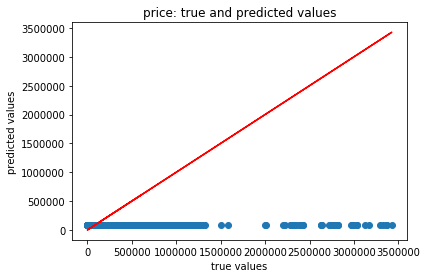

R-squared of the model in the training set is: -0.18353120032662718
-----Test set statistics-----
R-squared of the model in the test set is: -0.1665630831997298
Mean absolute error of the prediction is: 234105.3237657581
Mean squared error of the prediction is: 197787692285.04437
Root mean squared error of the prediction is: 444733.28218725027
Mean absolute percentage error of the prediction is: 519.48177596172
SVR Accuracy: -0.21 (+/- 0.03)


In [50]:
from sklearn.svm import SVR
#using best parameter
svr = SVR(kernel = 'poly', C = 5, gamma = 'auto')

svr.fit(X_train,y_train)

#making prediction
y_preds=svr.predict(X_test)


score = cross_val_score(svr, X_test, y_test, cv=5)

#plotting scatter
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("price: true and predicted values")
plt.show()

print("R-squared of the model in the training set is: {}".format(svr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(svr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
print("SVR Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Observation:
- SVR is not a good model to use for this datasets, as R2 is negative, accuracy is negative, and error is really high.
- So will not be using this model, this is really a bad model to go forward with.

#### Using Gradient Boosting Regression:

In [51]:
#importing library
from sklearn import ensemble

#finding best hyperparameter
gbc = ensemble.GradientBoostingRegressor()

model = gbc
#Hyper Parameters Set
params = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'n_estimators':[100, 200, 300, 500], 
         'criterion' : ['friedman_mse', 'mae', 'mse']}
#Making models with hyper parameters sets
model = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model.best_params_)


Best Hyper Parameters:
 {'criterion': 'mae', 'loss': 'huber', 'n_estimators': 100}


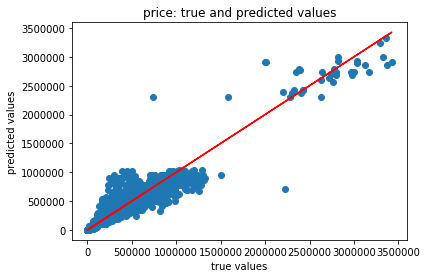

R-squared of the model in the training set is: 0.908792230833334
-----Test set statistics-----
R-squared of the model in the test set is: 0.9131231787782103
Mean absolute error of the prediction is: 57336.39683424383
Mean squared error of the prediction is: 14729735776.814564
Root mean squared error of the prediction is: 121366.12285483361
Mean absolute percentage error of the prediction is: 44.32390131564958
Gradientboosting Accuracy: 0.90 (+/- 0.04)


In [53]:
#using best hyperparameter

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
gbc = ensemble.GradientBoostingRegressor(loss = 'huber', n_estimators = 100 , criterion = 'mae')
gbc.fit(X_train, y_train)


#making prediction
y_preds=gbc.predict(X_test)


score = cross_val_score(gbc, X_test, y_test, cv=5)

#plotting scatter
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("price: true and predicted values")
plt.show()

print("R-squared of the model in the training set is: {}".format(gbc.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(gbc.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
print("Gradientboosting Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Observation:
- true values more toward to red line this time.
- R2 for training and test is about same which is 0.91.
- Accuracy of 0.90 with std deviation of 0.04.
- Errors is little higher.

### Comparison between models:


- OLS: R2 train = 0.87
       R2 test = 0.89
       RMSE = 138613.05706719437
       Accuracy = 0.88 (+/- 0.05
- Ridge regression: 
       R2 train = 0.87
       R2 test = 0.89
       RMSE = 138613.9896237482
       Accuracy = 0.88 (+/- 0.05

- Lasso regression: 
       R2 train = 0.87
       R2 test = 0.89
       RMSE = 138613.0569556556
       Accuracy = 0.88 (+/- 0.05
- ElasticNet regression: 
       R2 train = 0.87
       R2 test = 0.89
       RMSE = 138614.1523020187
       Accuracy = 0.88 (+/- 0.05
- KNN regression: 
       R2 train = 0.91
       R2 test = 0.91
       RMSE = 121414.26880590395
       Accuracy = 0.91 (+/- 0.03)
- DecisionTree regression: 
       R2 train = 0.97
       R2 test = 0.85
       RMSE = 158042.93224840946
       Accuracy = 0.85 (+/- 0.07)
       
- RandomForest regression: 
       R2 train = 0.98
       R2 test = 0.88
       RMSE = 143367.3873412276
       Accuracy = 0.88 (+/- 0.05)
       
- SVR: R2 train = -0.18
       R2 test = -0.17
       RMSE = 444733.28218725027
       Accuracy =  -0.21 (+/- 0.03)
- GradientBoosting regression: 
       R2 train = 0.909
       R2 test = 0.91
       RMSE = 121366.12285483361
       Accuracy = 0.90(+/-0.04)

Observation:
- From above, we can see clearly that KNN has higher accuracy, and R2 of train and test data is same which means the model prediction is better, and error is lower than others except gradient boosting.

## Conclusion:

- I was looking for the avocado total sale price and how other features affects its selling power, if they are positively or negatively correlated to total price of avocado sale.
- After data processing, data cleaning, exploration to see any outliers, correlation between features to avoid multicollinearity, and PCA to reduce multicollinearity, I came up with some features that might be highly correlated to total price of avocado but not with other features to get better prediction.
- Next, I splitted data into training and testing data sets, I trained model by implementing some changes in the features to get better model and predicted the model.
- To get better prediction I tried several regression models like ridge/lasso/elasticnet/knn/decisiontree/randomforest/SVR/gradientboosting to get better model.
- Among them I found KNN as a better model which gave higher acuracy, better prediction, and lower error than other models, we could use this model for further prediction with other datasets to predict different model with different features.
- Next step, I would love to look for the correlation between Avocado total sale price and features like housing price, Electricity bills, Economy, Water Resources and use model for prediction. 